In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [84]:
df = pd.read_csv('IRIS.csv')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [85]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [86]:
df = df.dropna()

In [87]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y =df['species']

In [88]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
species_names = le.classes_

In [89]:
X_train , X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [90]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [91]:
y_pred = model.predict(X_test)

In [92]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 100.00%


In [93]:
new_flower_measurements = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
predicted_species_code = model.predict(new_flower_measurements)
predicted_species_name = species_names[predicted_species_code[0]]

In [94]:
print(f"Predicted species for new measurements {list(new_flower_measurements.iloc[0])}: {predicted_species_name}")

Predicted species for new measurements [5.1, 3.5, 1.4, 0.2]: Iris-setosa


In [104]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,12))

<Figure size 1000x1200 with 0 Axes>

<Figure size 1000x1200 with 0 Axes>

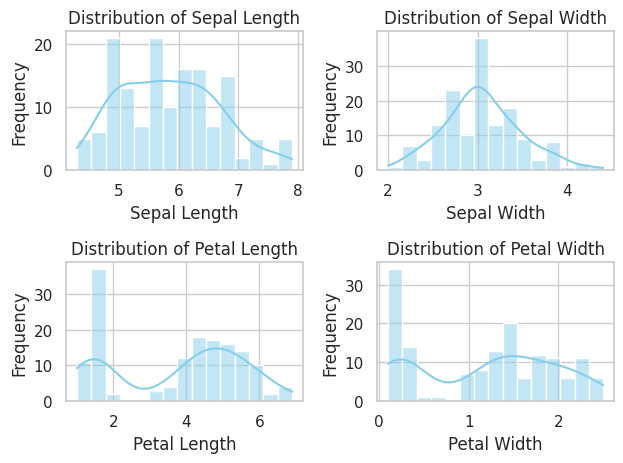

In [96]:
for i, col in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ").title()}', fontsize=12)
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

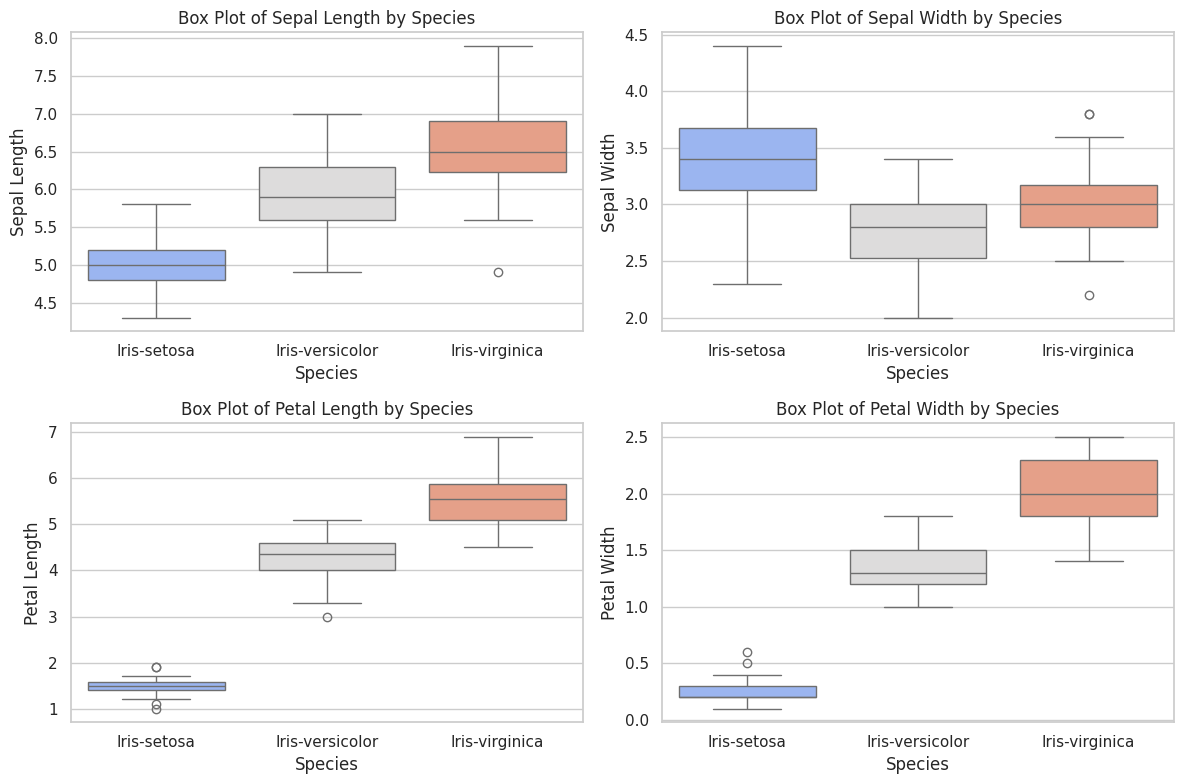

In [98]:
plt.figure(figsize=(12,8))
for i, col in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=col, data=df, palette='coolwarm')
    plt.title(f'Box Plot of {col.replace("_", " ").title()} by Species', fontsize=12)
    plt.xlabel('Species')
    plt.ylabel(col.replace("_", " ").title())
plt.tight_layout()
plt.show()

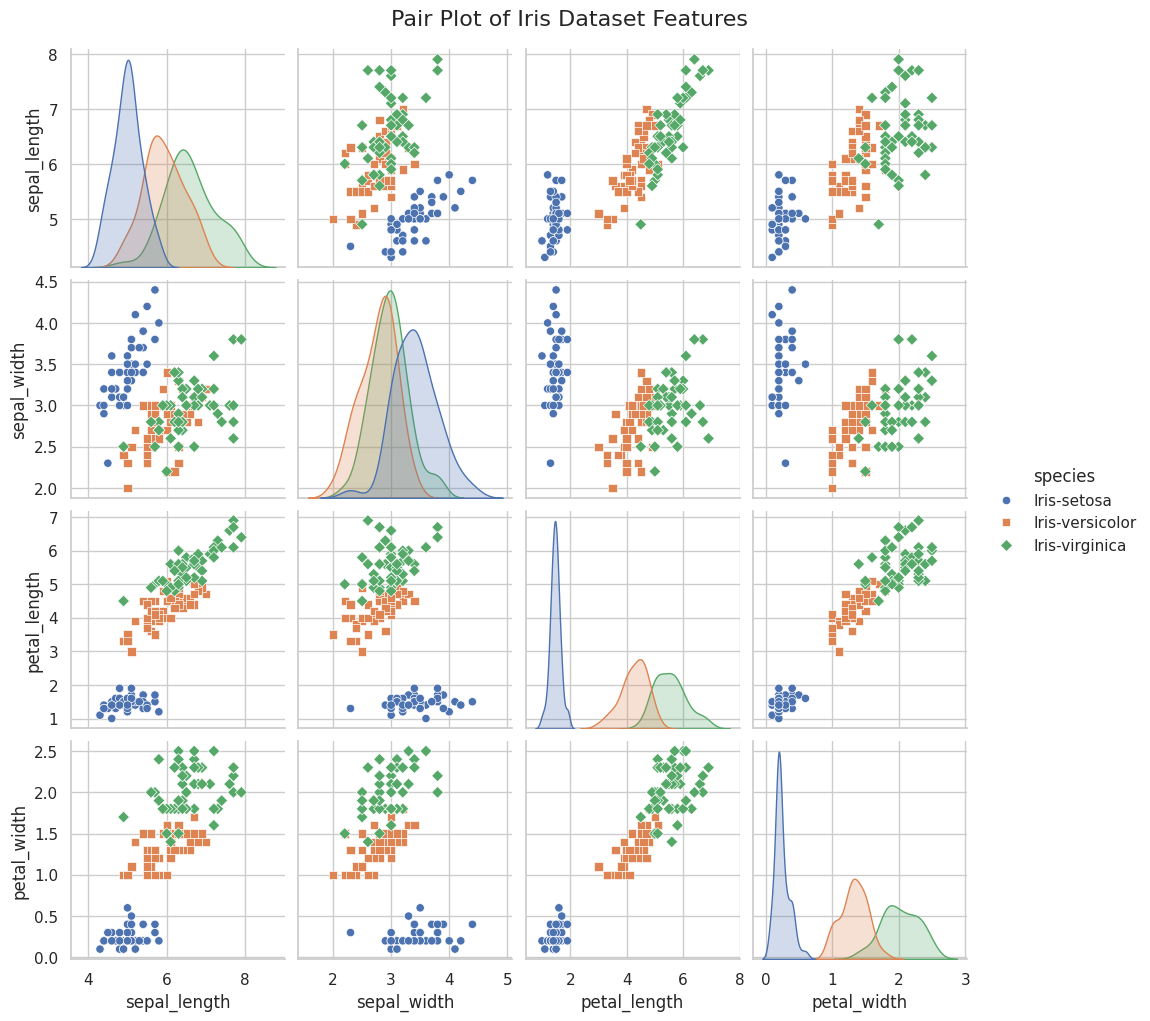

In [99]:
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])
plt.suptitle('Pair Plot of Iris Dataset Features', y=1.02, fontsize=16)
plt.show()

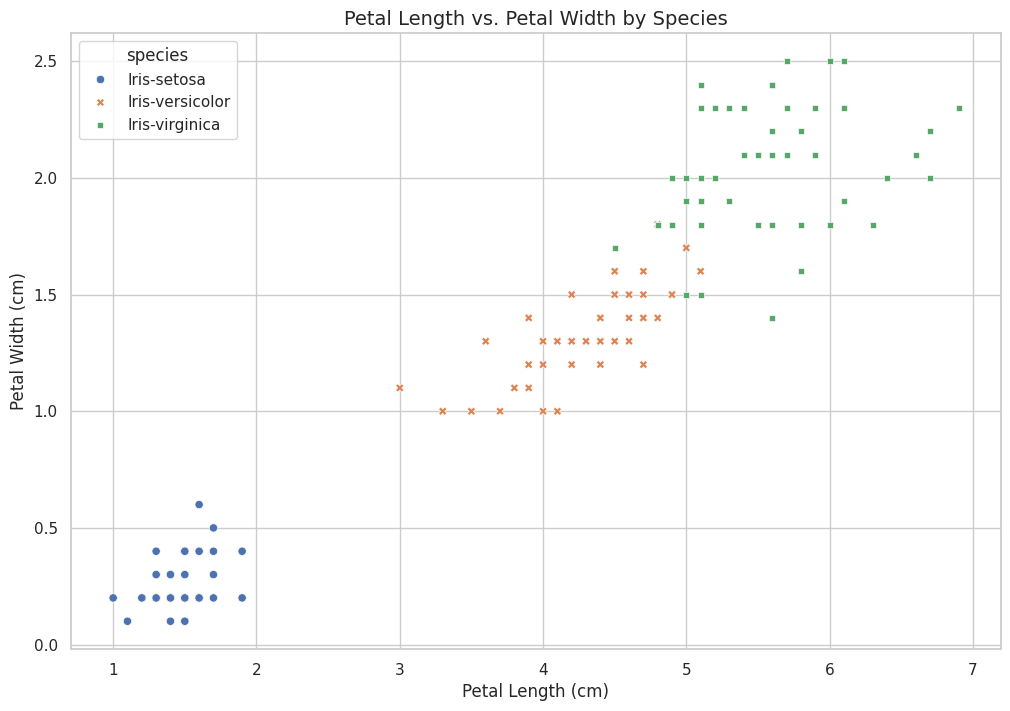

In [101]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, style='species')
plt.title('Petal Length vs. Petal Width by Species', fontsize=14)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()